In [1]:
# helper functions
from scipy.misc import imresize
from scipy.signal import convolve2d
from scipy import fftpack

def make_radius_map(Nx,Ny,dx,dy,x0,y0):
    yy,xx = np.meshgrid(np.arange(Nx),np.arange(Nx))
    rr = np.sqrt(((xx-x0)*dx)**2 + ((yy-y0)*dy)**2)
    return rr

def gauss2d(rr,dx,dy,sig):
    g = np.exp(-rr**2/2./sig**2) / (2*np.pi*sig**2)
    g *= dx*dy
    return g

def make_xxyy_map(Nx,Ny,dx,dy,x0,y0):
    yy,xx = np.meshgrid(np.arange(Nx),np.arange(Nx))
    xx = (xx-x0) * dx
    yy  =(yy-y0) * dy
    return xx,yy

def gauss2d_ellipse(xx,yy,dx,dy,sigx,sigy):
    g = np.exp(-xx**2/2./sigx**2)*np.exp(-yy**2/2./sigy**2) / (2*np.pi*sigx*sigy)
    g *= dx*dy
    return g

def rebin_map_coarse(mapin,Nx,Ny):
    '''
    binning Nx,Ny mapin pixel to a large pixel.
    '''
    Nsx,Nsy = mapin.shape
    Nlx = round(Nsx/Nx)
    Nly = round(Nsy/Ny)
    
    rbmap=np.zeros([Nlx,Nly])
    for i in np.arange(Nlx):
        for j in np.arange(Nly):
            rbmap[i,j]=np.mean(mapin[i*Nx:(i+1)*Nx,j*Ny:(j+1)*Ny])

    return rbmap

def get_1D_profile(mapin,dx,dy, logbin=True, nbins = 15, binedges = []):
    rr = make_radius_map(mapin.shape[0],mapin.shape[1],dx,dy,Nsub,Nsub)
    rmin = min(rr[rr>0])
    rmax = max(rr[rr>0])

    if len(binedges)==0:
        if logbin: 
            binedges = np.logspace(np.log10(rmin),np.log10(rmax), nbins+1)
            bins = (binedges[:-1] + binedges[1:]) / 2
            binedges[0] = 0
            binedges[-1] *= 1.01
        else: 
            binedges = np.linspace(np.min(rmin), rmax, nbins+1)
            bins = np.sqrt(binedges[:-1] * binedges[1:])
            binedges[-1] *= 1.01

    else:
        bins = (binedges[:-1] + binedges[1:]) / 2
    
    P1D = np.histogram(rr, bins=binedges, weights=mapin)[0] \
         / np.histogram(rr, bins=binedges)[0]
    
    return P1D,bins

In [92]:
rr = make_radius_map(1500,1500,1/500,1/500,850,650)
psf_beam = gauss2d(rr,1,1,100)
psf_beam_large = rebin_map_coarse(psf_beam,300,300)

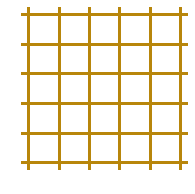

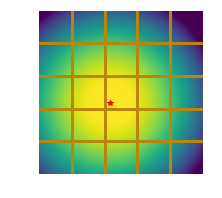

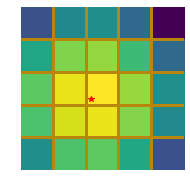

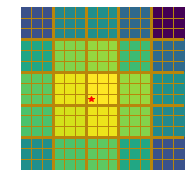

In [116]:
plt.figure(figsize=(3,3))
for (x,y) in zip([1,2,3,4,5,6],[1,2,3,4,5,6]):
    plt.axvline(x,c='darkgoldenrod',lw=3)
    plt.axhline(y,c='darkgoldenrod',lw=3)
plt.axis('off')
plt.savefig('/Users/ytcheng/Desktop/1.png', dpi = 300)

plt.figure(figsize=(3,3))
plt.imshow(psf_beam,vmin=np.min(psf_beam_large), vmax=np.max(psf_beam_large))
plt.plot([650],[850],'r*')
for (x,y) in zip([300,600,900,1200],[300,600,900,1200]):
    plt.axvline(x,c='darkgoldenrod',lw=3)
    plt.axhline(y,c='darkgoldenrod',lw=3)
plt.axis('off')
plt.savefig('/Users/ytcheng/Desktop/2.png', dpi = 300)

plt.figure(figsize=(3,3))
plt.plot([1.66],[2.33],'r*')
plt.imshow(psf_beam_large,vmin=np.min(psf_beam_large), vmax=np.max(psf_beam_large))
for (x,y) in zip([0.5,1.5,2.5,3.5],[0.5,1.5,2.5,3.5]):
    plt.axvline(x,c='darkgoldenrod',lw=3)
    plt.axhline(y,c='darkgoldenrod',lw=3)
plt.axis('off')
plt.savefig('/Users/ytcheng/Desktop/3.png', dpi = 300)


plt.figure(figsize=(3,3))
plt.plot([1.66],[2.33],'r*')
plt.imshow(psf_beam_large,vmin=np.min(psf_beam_large), vmax=np.max(psf_beam_large))
for (x,y) in zip([0.5,1.5,2.5,3.5],[0.5,1.5,2.5,3.5]):
    plt.axvline(x,c='darkgoldenrod',lw=3)
    plt.axhline(y,c='darkgoldenrod',lw=3)
plt.axis('off')
for (x,y) in zip(np.arange(1/3,1/3*15,1/3)-0.5,np.arange(1/3,1/3*15,1/3)-0.5):
    plt.axvline(x,c='darkgoldenrod',lw=1)
    plt.axhline(y,c='darkgoldenrod',lw=1)
plt.savefig('/Users/ytcheng/Desktop/4.png', dpi = 300)